In [1]:
import desc.monitor
import os
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

/global/common/cori/contrib/lsst/lsstDM/v12_1/Linux64/sims_catalogs/master-g89e82bbb01+1/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/global/common/cori/contrib/lsst/lsstDM/v12_1/Linux64/sims_catalogs/master-g89e82bbb01+1/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


#### Build lightcurve from local tables

In [2]:
#Just point to the folder where the forced photometry output is and also to a file with the mjd of each visit num
forcedPhotometryFolder = '../data/test/forced/'
lc = desc.monitor.LightCurve(fp_table_dir=forcedPhotometryFolder, 
                             mjd_file = os.path.join('../data/','selectedVisits.csv'))

In [3]:
obj_id = 111
lc.build_lightcurve(obj_id)

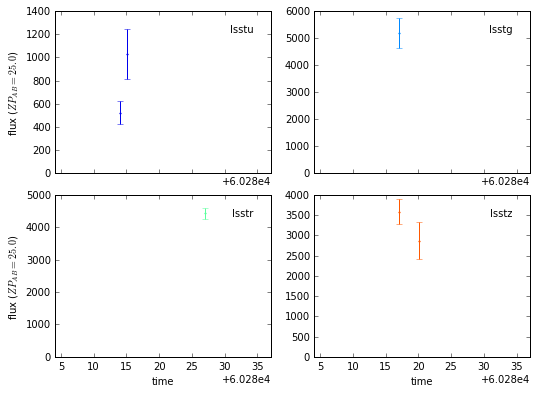

In [4]:
fig = lc.visualize_lightcurve()

#### Build lightcurve from database

Once an ssh tunnel is setup then one can use the build_lightcurve_from_db routine or connect to the database to find possible targets.

In [5]:
#Setup a database connection directly
dbConn = desc.monitor.dbConnection.dbInterface(database='DESC_Twinkles_Level_2',
                                               #if running from ssh-tunnel uncomment below
                                               #host='localhost', port=3307,
                                               #or if running jupyter-dev uncomment below
                                               host='scidb1.nersc.gov', port=3306,
                                               driver='mysql')

In [6]:
#Find possible targets
ra_dec = (53.018, -27.584)
possible_targets = dbConn.objectFromRaDec(ra_dec[0], ra_dec[1], tol=0.001)
print possible_targets

[(111, 0, 53.01789949, -27.58400945) (38525, 111, 53.0178996, -27.58400958)
 (38526, 111, 53.01746854, -27.58363123)]


In [7]:
obj_id = 38526
lc.build_lightcurve_from_db(objid = obj_id, database='DESC_Twinkles_Level_2',
                                            #if running from ssh-tunnel uncomment below
                                            #host='localhost', port=3307,
                                            #or if running jupyter-dev uncomment below
                                            host='scidb1.nersc.gov', port=3306,
                                            driver='mysql')

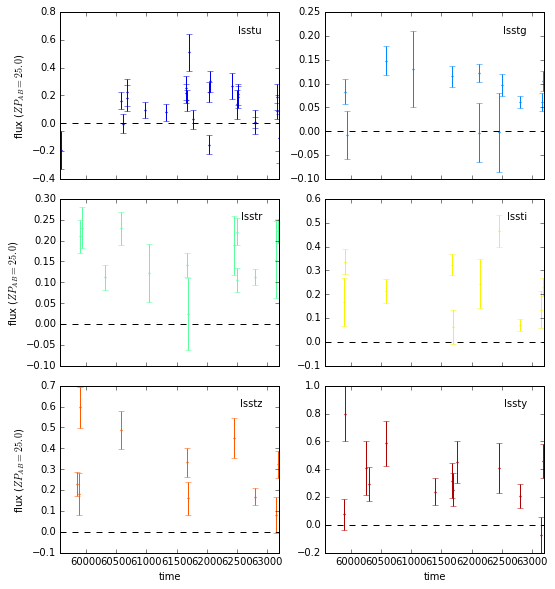

In [8]:
fig = lc.visualize_lightcurve()
plt.tight_layout()